# EDA

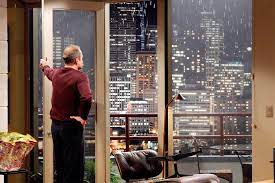

In [822]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [823]:

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)

#### Checking the data

In [824]:
# Create DataFrame 
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [825]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [826]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [827]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [829]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [830]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()
# no duplicates

False    21597
dtype: int64

##### My Hypothoses:

* The sale price increases with the proximity to the city center.
    * How far or near can we find cheap houses for families? Can't be rural because of work and school -> has to be minimum in suburbs.
* The more rooms a house has the more expensive it is.
* The more sqft_living a house has, the more expensive it is.
    * Combine the last two Hypotheses. Can we find big houses with few rooms to renovate and sell with small profit?
* Homes in a neighbourhood of people with a migration background are cheaper. (e.g Chinatown in Seattle)

##### Cleaning Data

Because column price is the most important regarding the stakeholders interest in buying cheap, first create a variable price/sqft_living and save in DataFrame.

* Make a plot for column price_per_sqft, because only houses with low prices are interesting for the stakeholder. (Detect witch average to use for further filtering: Mean, Mode or Median?)
* Filter the DataFrame: Save in DataFrame that only houses with price_per_sqft below or equal to average are in. 
* Make a plot again and decide on new average for further filtering. 
* Use the new average to filter for cheap houses. 


Price per sqft is missing in dataset. Make new column: price_per_sqft

In [831]:
# Calculate price per sqft_living per house:
price_per_sqft_series= df['price']/df['sqft_living']
price_per_sqft_series.name = 'price_per_sqft'
df = pd.concat([df, price_per_sqft_series], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [832]:
df['price_per_sqft'].describe()

count   21597.000
mean    264.143  
std     110.000  
min     87.588   
25%     182.292  
50%     244.645  
75%     318.333  
max     810.139  
Name: price_per_sqft, dtype: float64

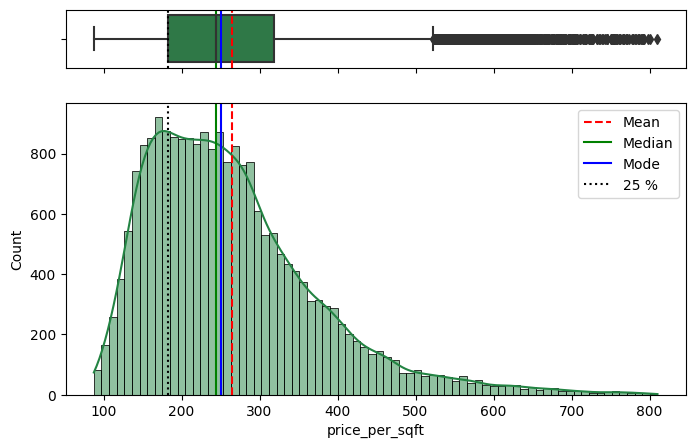

In [833]:
# Boxplot and Histogram for 'price-per_sqft' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price_per_sqft'].mean()
median=df['price_per_sqft'].median()
mode=df['price_per_sqft'].mode().values[0]
cutoff=df['price_per_sqft'].quantile(0.25)

sns.boxplot(data=df, x="price_per_sqft", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="price_per_sqft", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="25 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()


# Positively skewed graph: use median instead of mean for average.

Is there a correlation between price and price per sqft and bedrooms? Check hypothesis: The more rooms the higher the price.

In [834]:
# correlation between price_per_sqft and bedrooms:
corr = df['bedrooms'].corr(df['price'])
print(corr.round(1))

# correlation is moderate

0.3


In [835]:
corr = df['sqft_living'].corr(df['price'])
print(corr.round(1))

# more sqft_living higher price, but price rises quicker in correlation to sqft_living

0.7


In [836]:
corr = df['sqft_living'].corr(df['bedrooms'])
print(corr.round(1))

0.6


In [837]:
# inspect bedrooms data
df['bedrooms'].describe()

count   21597.000
mean    3.373    
std     0.926    
min     1.000    
25%     3.000    
50%     3.000    
75%     4.000    
max     33.000   
Name: bedrooms, dtype: float64

<AxesSubplot:>

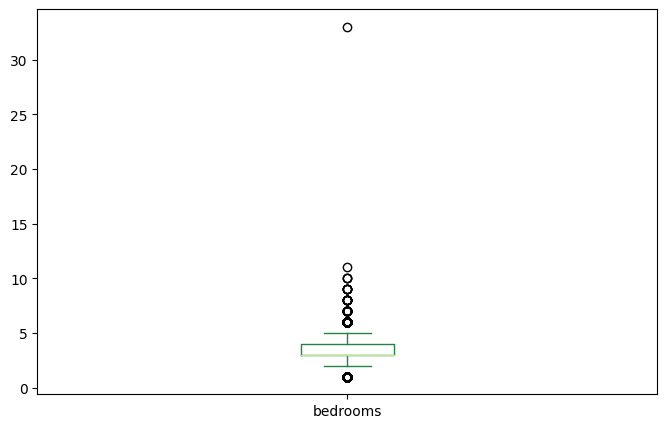

In [838]:
# make boxplot to show outliers:
df['bedrooms'].plot(kind='box')

In [839]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df.query('bedrooms < 6'), x='price', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

There is a strong correlation between the price and the number of rooms.

In [840]:
#gropby('zipcode').price.mean() in column speichern und dann df danach filtern und in obigen scatterplot einbauen: neuen machen
zipcode_price_median = df.groupby('zipcode').median()['price_per_sqft']
zipcode_price_median.name = 'zip_price_median'
df.merge(zipcode_price_median, on='zipcode')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_median
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051,176.623
1,4060000240,6/23/2014,205425.000,2,1.000,880,6780,1.000,0.000,0.000,4,6,880,0.0,1945,0.000,98178,47.501,-122.248,1190,6780,233.438,176.623
2,4058801670,7/17/2014,445000.000,3,2.250,2100,8201,1.000,NaN,2.000,3,8,1620,480.0,1967,0.000,98178,47.509,-122.244,2660,8712,211.905,176.623
3,2976800796,9/25/2014,236000.000,3,1.000,1300,5898,1.000,NaN,0.000,3,7,1300,0.0,1961,NaN,98178,47.505,-122.255,1320,7619,181.538,176.623
4,6874200960,2/27/2015,170000.000,2,1.000,860,5265,1.000,0.000,0.000,3,6,860,0.0,1931,0.000,98178,47.505,-122.272,1650,8775,197.674,176.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2525049086,10/3/2014,2720000.000,4,3.250,3990,18115,2.000,0.000,0.000,4,11,3990,0.0,1989,NaN,98039,47.618,-122.229,3450,16087,681.704,565.166
21593,2525049113,7/25/2014,1950000.000,4,3.500,4065,18713,2.000,0.000,0.000,4,10,4065,0.0,1987,0.000,98039,47.621,-122.237,3070,18713,479.705,565.166
21594,3262300485,4/21/2015,2250000.000,5,5.250,3410,8118,2.000,NaN,0.000,3,11,3410,0.0,2006,0.000,98039,47.630,-122.236,3410,16236,659.824,565.166
21595,6447300365,11/13/2014,2900000.000,5,4.000,5190,14600,2.000,0.000,1.000,3,11,5190,0.0,2013,0.000,98039,47.610,-122.225,3840,19250,558.767,565.166


In [841]:
# Show and save only the rows where the price is lower than the price.median()
#df = df[df['price_per_sqft'] <= df['price_per_sqft'].quantile(0.25)] 
#df.info()

# From 21.597 entries to 16198 entries.

In [842]:
df['price_per_sqft'].max()

810.1388888888889

In [843]:
df['price'].max()

7700000.0

In [844]:
# how many bedrooms and bathrooms in rest of houses?

##### Start dropping columns

Start dropping columns if correlation between columns and column 'price_per_sqft' is weak (0.2) or moderate (0.3).
<br>
Drop it like it's hot...
<br>

In [845]:
# Drop the ID column: won't need it for merging
df = df.drop('id', axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [846]:
# correlation between column waterfront and column price_per_sqft
corr_matrix = df['waterfront'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# correlation is weak -> drop column waterfront
df = df.drop('waterfront', axis=1)
df.head()

0.2


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [847]:
# correlation between column floors and column price_per_sqft
corr_matrix = df['floors'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# correlation is weak -> drop column floors
df = df.drop('floors', axis=1)
df.head()

0.0


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [848]:
# correlation between column view and column price_per_sqft
corr_matrix = df['view'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# correlation is weak -> drop column view
df = df.drop('view', axis=1)
df.head()

0.2


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [849]:
# correlation between column condition and column price_per_sqft
corr_matrix = df['condition'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# correlation is weak --> drop column condition
df = df.drop('condition', axis=1)
df.head()

0.1


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [850]:
# correlation between column grade and column price_per_sqft
corr_matrix = df['grade'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# correlation is weak -> drop column grade
df = df.drop('grade', axis=1)
df.head()

0.1


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [851]:
# Focus on column price_per_sqft --> drop columns: sqft_basement and sqft_above
df = df.drop(['sqft_basement', 'sqft_above'], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,5650,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,7242,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,10000,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,5000,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,8080,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [852]:
# correlation between column bedrooms and column price_per_sqft
corr_matrix = df['bedrooms'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# correlation is weak! -> don't drop column bedrooms!! Needed to filter. Idea: Renovate big/ger houses with few rooms for families. 

-0.2


In [853]:
# correlation between column bathrooms and column price_per_sqft
corr_matrix = df['bathrooms'].corr(df['price_per_sqft'])
print(corr_matrix.round(1))

# no correlation, but! -> don't drop column bathrooms, bathrooms are essential for families

-0.1


In [854]:
# Drop column sqft_lot, because renovations regarding annexes are not in the stakeholders interest.
df = df.drop('sqft_lot', axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,1955,0.000,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,1951,1991.000,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,1933,NaN,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,1965,0.000,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,1987,0.000,98074,47.617,-122.045,1800,7503,303.571


In [855]:
df.info()
# yr_renovated is missing values: 16.198 entries but only 13.337 entries in yr_renovated 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21597 non-null  object 
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   yr_built        21597 non-null  int64  
 6   yr_renovated    17755 non-null  float64
 7   zipcode         21597 non-null  int64  
 8   lat             21597 non-null  float64
 9   long            21597 non-null  float64
 10  sqft_living15   21597 non-null  int64  
 11  sqft_lot15      21597 non-null  int64  
 12  price_per_sqft  21597 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 2.1+ MB


In [856]:
# Make correlation matrix for columns yr_built, yr_renovated and price_per_sft, because of missing values in yr_renovated.

# make a variable to hold columns for correlation matrix:
features = ['yr_built', 'yr_renovated', 'price_per_sqft']
corr_matrix = df[features].corr()
print(corr_matrix.round(1))

# correlation is weak for yr_built and yr_renovated -> drop these columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

                yr_built  yr_renovated  price_per_sqft
yr_built       1.000     -0.200        -0.300         
yr_renovated   -0.200    1.000         0.100          
price_per_sqft -0.300    0.100         1.000          


,date,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,10/13/2014,221900.000,3,1.000,1180,98178,47.511,-122.257,1340,5650,188.051
1,12/9/2014,538000.000,3,2.250,2570,98125,47.721,-122.319,1690,7639,209.339
2,2/25/2015,180000.000,2,1.000,770,98028,47.738,-122.233,2720,8062,233.766
3,12/9/2014,604000.000,4,3.000,1960,98136,47.521,-122.393,1360,5000,308.163
4,2/18/2015,510000.000,3,2.000,1680,98074,47.617,-122.045,1800,7503,303.571


In [857]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,98077.952,47.560,-122.214,1986.620,12758.284,264.143
std,367368.140,0.926,0.769,918.106,53.513,0.139,0.141,685.230,27274.442,110.000
min,78000.000,1.000,0.500,370.000,98001.000,47.156,-122.519,399.000,651.000,87.588
25%,322000.000,3.000,1.750,1430.000,98033.000,47.471,-122.328,1490.000,5100.000,182.292
50%,450000.000,3.000,2.250,1910.000,98065.000,47.572,-122.231,1840.000,7620.000,244.645
75%,645000.000,4.000,2.500,2550.000,98118.000,47.678,-122.125,2360.000,10083.000,318.333
max,7700000.000,33.000,8.000,13540.000,98199.000,47.778,-121.315,6210.000,871200.000,810.139


##### Checking first Hypothesis: Homes that are further away of a city center or are in a rural area are cheaper. 
##### Distance from a house to the city center (by my definition a city center is where the town/city hall is). 
##### I need:
* Top ten cities in King County by Total Population by Place
* Latitude and longitude of the cities town halls
* Function to calculate the distance between each house and my top ten city centers
* Function that returns the smallest distance to a city center.
* Make two new columns: column city (shows with city is nearest to the house) and column distance_to_center (shows distance in km from house to the city center).

In [858]:
# Top ten cities in King County by Total Population by Place: 
# Source: https://statisticalatlas.com/county/Washington/King-County/Population
# Definition city center: lat and long of city town/city hall

# Dict of Top ten cities in King County by Total Population by Place
cities = {
    'Seattle':  (47.5994862,-122.3386744),
    'Bellvue': (47.614463,-122.2310811),
    'Kent': (47.3806225,-122.2561947,),
    'Renton': (47.4747632,-122.2142851),
    'Federal Way': (47.3012382,-122.322559),
    'Kirkland': (47.678471,-122.2452861),
    'Auburn': (47.3078503,-122.2484648),
    'Sammamish': (47.601572,-122.0390594),
    'Redmond': (47.6789194,-122.1358138),
    'Shoreline': (47.7562273,-122.3463749)

}


# Calculate distance from house to city center: ((house.lat - center.lat) + (house.long - center.long)**2)**0.5
# 1 degree = 111km
def distance(lat: float, long: float, center: tuple[float, float]) -> float:
    return round((((lat - center[0])**2 + (long - center[1])**2)**0.5)*111, 3)


# Returns smallest distance to center of nearest city in km:
def distance_to_center(lat: float, long: float) -> tuple:
    distances = {cityname: distance(lat, long, center) for cityname, center in cities.items()}
    smallest_distance = min(distances.items(), key=lambda x: x[1])
    return smallest_distance

In [859]:
# Create new column: 'city'
df['city'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[0], axis=1)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,city
0,10/13/2014,221900.000,3,1.000,1180,98178,47.511,-122.257,1340,5650,188.051,Renton
1,12/9/2014,538000.000,3,2.250,2570,98125,47.721,-122.319,1690,7639,209.339,Shoreline
2,2/25/2015,180000.000,2,1.000,770,98028,47.738,-122.233,2720,8062,233.766,Kirkland
3,12/9/2014,604000.000,4,3.000,1960,98136,47.521,-122.393,1360,5000,308.163,Seattle
4,2/18/2015,510000.000,3,2.000,1680,98074,47.617,-122.045,1800,7503,303.571,Sammamish


In [860]:
# Create new column: 'distance_to_center'
df['distance_to_center'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[1], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,city,distance_to_center
0,10/13/2014,221900.000,3,1.000,1180,98178,47.511,-122.257,1340,5650,188.051,Renton,6.232
1,12/9/2014,538000.000,3,2.250,2570,98125,47.721,-122.319,1690,7639,209.339,Shoreline,4.952
2,2/25/2015,180000.000,2,1.000,770,98028,47.738,-122.233,2720,8062,233.766,Kirkland,6.736
3,12/9/2014,604000.000,4,3.000,1960,98136,47.521,-122.393,1360,5000,308.163,Seattle,10.614
4,2/18/2015,510000.000,3,2.000,1680,98074,47.617,-122.045,1800,7503,303.571,Sammamish,1.814


In [861]:
# Create new column: distance_rating for future plotting

# [0, 10, 20, 30, 40] --> ['center', 'near center', 'suburbs', 'rural']

distance_rating_bins = pd.cut(df['distance_to_center'], [0, 10, 20, 30, 40], labels=['center', 'near center', 'suburbs', 'rural']) #, labels=['center', 'near center', 'suburbs', 'outer area', 'rural'])
distance_rating_bins.name = 'distance_rating'

df = df.join(distance_rating_bins, how='inner')
df.head(10)
# print(distance_rating_bins)

,date,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,city,distance_to_center,distance_rating
0,10/13/2014,221900.000,3,1.000,1180,98178,47.511,-122.257,1340,5650,188.051,Renton,6.232,center
1,12/9/2014,538000.000,3,2.250,2570,98125,47.721,-122.319,1690,7639,209.339,Shoreline,4.952,center
2,2/25/2015,180000.000,2,1.000,770,98028,47.738,-122.233,2720,8062,233.766,Kirkland,6.736,center
3,12/9/2014,604000.000,4,3.000,1960,98136,47.521,-122.393,1360,5000,308.163,Seattle,10.614,near center
4,2/18/2015,510000.000,3,2.000,1680,98074,47.617,-122.045,1800,7503,303.571,Sammamish,1.814,center
5,5/12/2014,1230000.000,4,4.500,5420,98053,47.656,-122.005,4760,101930,226.937,Sammamish,7.136,center
6,6/27/2014,257500.000,3,2.250,1715,98003,47.310,-122.327,2238,6819,150.146,Federal Way,1.061,center
7,1/15/2015,291850.000,3,1.500,1060,98198,47.410,-122.315,1650,9711,275.330,Kent,7.272,center
8,4/15/2015,229500.000,3,1.000,1780,98146,47.512,-122.337,1780,8113,128.933,Seattle,9.679,center
9,3/12/2015,323000.000,3,2.500,1890,98038,47.368,-122.031,2390,7570,170.899,Renton,23.522,suburbs


##### Time to plot...

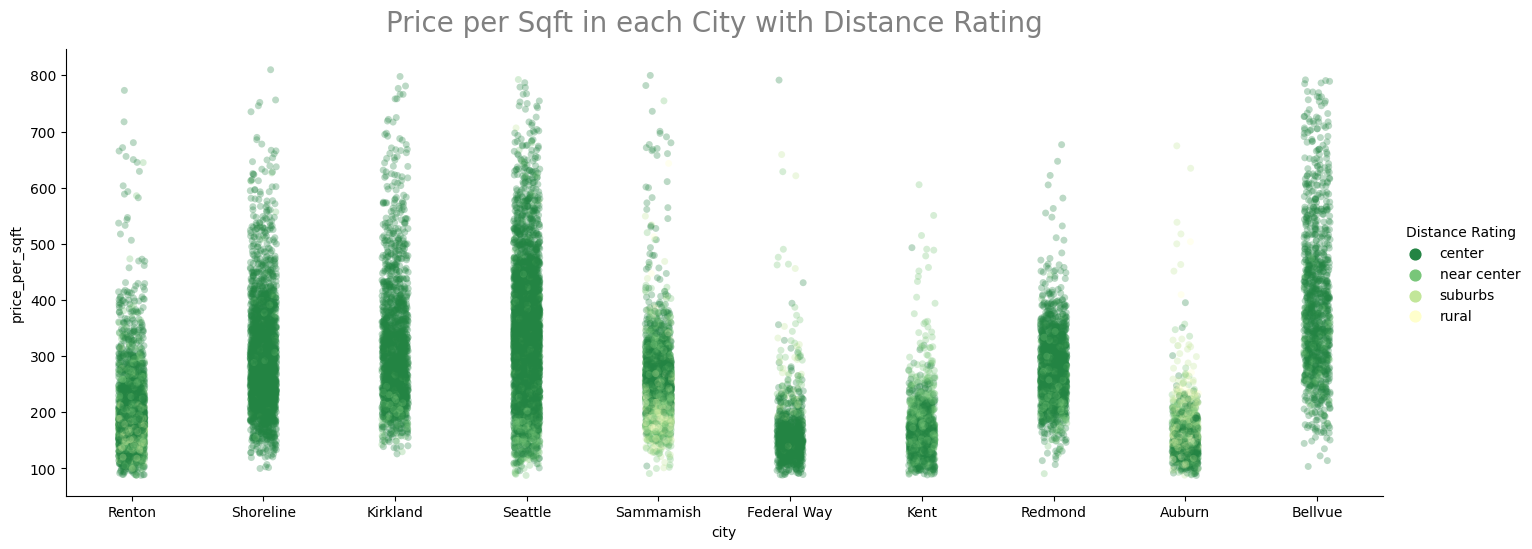

In [862]:
# To create custom color palette: Create an array with the colors: 
colors = ['#238443','#78c679','#c2e699','#ffffcc']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

my_plot = sns.catplot(
    # you can use query on the data frame
    data=df,
    # set x and y axes, and a third categorical variable to display in color
    x='city', y='price_per_sqft', hue='distance_rating', 
    # the catplot has the option to add jitter to data points to keep them from overlapping as they would in the scatterplot,
    # default is True
    jitter=True, 
    # chose a color palette
    palette=customPalette,
    # by default, the legend is True, but was not to my taste :)
    legend=False,
    alpha=0.3
    )

# set figure size:
my_plot.fig.set_size_inches(15,5)

# set title 
my_plot.fig.suptitle('Price per Sqft in each City with Distance Rating', y=(1.05), size=20, color='grey')

# add a nicer legend with more options:
my_plot.add_legend(title='Distance Rating')

# show the graph
plt.show(my_plot)

    


In [863]:
# calculate correlation for each city for distance_to_center and price_per_sqft
correlations = {}
for city in cities:
    city_series = df['city'] == city
    city_df = df[city_series]
    correlations[city] = city_df[['distance_to_center', 'price_per_sqft']].corr()
print(correlations)

{'Seattle':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.267         
price_per_sqft     -0.267              1.000          , 'Bellvue':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.580         
price_per_sqft     -0.580              1.000          , 'Kent':                     distance_to_center  price_per_sqft
distance_to_center 1.000               0.268          
price_per_sqft     0.268               1.000          , 'Renton':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.136         
price_per_sqft     -0.136              1.000          , 'Federal Way':                     distance_to_center  price_per_sqft
distance_to_center 1.000               0.521          
price_per_sqft     0.521               1.000          , 'Kirkland':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.442  

##### Findings so far:

In Shoreline, Kirkland, Seattle, Redmond and Bellvue the price per sqft will rise the nearer to the center the houses are. 
In this data visualisation all houses are included (small or big, few or many bedrooms).
It would be interesting to look, how and if the scatterplot will change when we filter for big houses with few bedrooms. These are our targeted houses. 

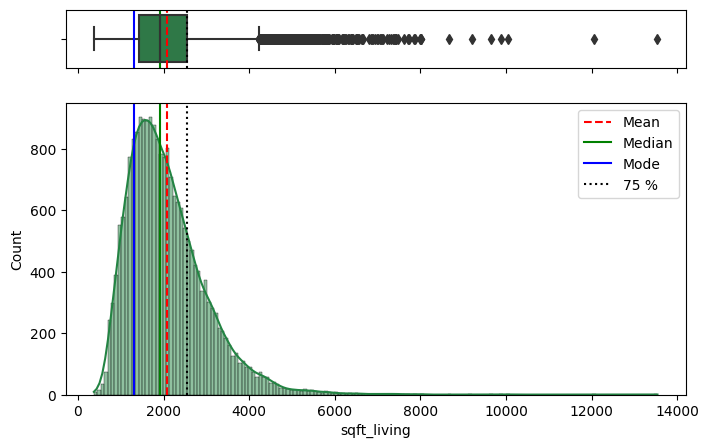

In [864]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['sqft_living'].mean()
median=df['sqft_living'].median()
mode=df['sqft_living'].mode().values[0]
cutoff=df['sqft_living'].quantile(0.75)

sns.boxplot(data=df, x="sqft_living", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="sqft_living", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

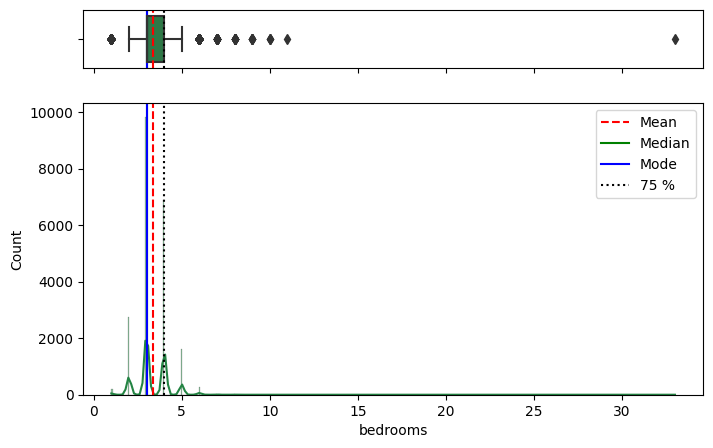

In [865]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['bedrooms'].mean()
median=df['bedrooms'].median()
mode=df['bedrooms'].mode().values[0]
cutoff=df['bedrooms'].quantile(0.75)

sns.boxplot(data=df, x="bedrooms", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="bedrooms", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [866]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,city,distance_to_center,distance_rating
0,10/13/2014,221900.000,3,1.000,1180,98178,47.511,-122.257,1340,5650,188.051,Renton,6.232,center
1,12/9/2014,538000.000,3,2.250,2570,98125,47.721,-122.319,1690,7639,209.339,Shoreline,4.952,center
2,2/25/2015,180000.000,2,1.000,770,98028,47.738,-122.233,2720,8062,233.766,Kirkland,6.736,center
3,12/9/2014,604000.000,4,3.000,1960,98136,47.521,-122.393,1360,5000,308.163,Seattle,10.614,near center
4,2/18/2015,510000.000,3,2.000,1680,98074,47.617,-122.045,1800,7503,303.571,Sammamish,1.814,center


In [867]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,distance_to_center
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,98077.952,47.560,-122.214,1986.620,12758.284,264.143,8.475
std,367368.140,0.926,0.769,918.106,53.513,0.139,0.141,685.230,27274.442,110.000,6.239
min,78000.000,1.000,0.500,370.000,98001.000,47.156,-122.519,399.000,651.000,87.588,0.143
25%,322000.000,3.000,1.750,1430.000,98033.000,47.471,-122.328,1490.000,5100.000,182.292,4.952
50%,450000.000,3.000,2.250,1910.000,98065.000,47.572,-122.231,1840.000,7620.000,244.645,7.012
75%,645000.000,4.000,2.500,2550.000,98118.000,47.678,-122.125,2360.000,10083.000,318.333,9.361
max,7700000.000,33.000,8.000,13540.000,98199.000,47.778,-121.315,6210.000,871200.000,810.139,81.317


In [868]:
# Make series with rows with 3 and less bedrooms:
bedrooms_series = df['bedrooms'] <= df['bedrooms'].mode()
bedrooms_series.name = 'few_bedrooms'

# Make series with rows where sqft_living is above the mode:
sqft_living_series = df['sqft_living'] >= df['sqft_living'].mode()
sqft_living_series.name = 'sqft_living_big'

# = pd.concat([df, price_per_sqft_series], axis=1)
#df.head()

ValueError: Can only compare identically-labeled Series objects

In [ ]:
#plt.scatter(df['distance_to_center'], df['price_per_sqft'], alpha=0.2)

#plt.xlabel('Distance to City Center (km)')
#plt.ylabel('Price per Sqft (US $)')
#plt.title('Distance to City Center vs. Price per Sqft')

#plt.show();

In [ ]:
#df.query('city == "Shoreline"').plot(kind='scatter', x='distance_to_center', y='price_per_sqft', alpha=0.2);
